### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Data

In [2]:
df=pd.read_csv('car.csv')

In [3]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


### Data Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


All columns are object datatype so we need to fix it.

#### Price Column Pre-Processing

In [5]:
df['Price'].min()

'1,00,000'

In [6]:
df['Price'].max()

'Ask For Price'

'Price' column has this 'Ask For Price' value we need to remove this. 

In [7]:
indexes=df[df['Price']=='Ask For Price'].index

In [8]:
df=df.drop(indexes)

In [9]:
df[df['Price']=='Ask For Price']

,name,company,year,Price,kms_driven,fuel_type


Dropped these rows as we need the price for making predictions.

In [10]:
df['Price'].min()

'1,00,000'

In [11]:
df['Price'].max()

'99,999'

Now our price data is numeric but we need to remove ',' from it and convert the datatype to integer.

In [12]:
df['Price']=df['Price'].str.replace(',','')

In [13]:
df['Price']

0       80000
1      425000
3      325000
4      575000
6      175000
        ...  
887    310000
888    260000
889    390000
890    180000
891    160000
Name: Price, Length: 857, dtype: object

In [14]:
df['Price']=pd.to_numeric(df['Price'])

In [15]:
df['Price'].dtypes

dtype('int64')

In [16]:
df['year'].dtypes

dtype('O')

In [17]:
df['year']

0      2007
1      2006
3      2014
4      2014
6      2012
       ... 
887    zest
888    2018
889    2013
890    2014
891    2014
Name: year, Length: 857, dtype: object

In [18]:
# Clean the 'year' column by removing non-numeric characters
df['year'] = df['year'].str.replace(r'\D', '', regex=True)


In [19]:
df['year']

0      2007
1      2006
3      2014
4      2014
6      2012
       ... 
887        
888    2018
889    2013
890    2014
891    2014
Name: year, Length: 857, dtype: object

In [20]:
# Convert the cleaned column to integer datatype
df['year'] = pd.to_numeric(df['year'])


In [21]:
df['year'].dtypes

dtype('float64')

In [22]:
df.describe()

,year,Price
count,824.000000,8.570000e+02
mean,2000.442961,4.046885e+05
std,153.811428,4.655365e+05
min,2.000000,3.000000e+04
25%,2010.000000,1.750000e+05
50%,2013.000000,2.999990e+05
75%,2015.000000,4.850000e+05
max,2019.000000,8.500003e+06


So our 'Price' column and 'year' column is fixed. Time to fix our 'kms_driven' column.

#### 'kms_driven' column Pre-Processing

In [23]:
df['kms_driven']

0      45,000 kms
1          40 kms
3      28,000 kms
4      36,000 kms
6      41,000 kms
          ...    
887           NaN
888    27,000 kms
889    40,000 kms
890        Petrol
891        Petrol
Name: kms_driven, Length: 857, dtype: object

'kms_driven' column has 'kms' and ',' in it so we need to remove these and convert it to integer.

In [24]:
df['kms_driven']=df['kms_driven'].str.replace(' kms','')


In [25]:
df['kms_driven']=df['kms_driven'].str.replace(',','')

In [26]:
df['kms_driven']

0       45000
1          40
3       28000
4       36000
6       41000
        ...  
887       NaN
888     27000
889     40000
890    Petrol
891    Petrol
Name: kms_driven, Length: 857, dtype: object

In [27]:
df['kms_driven'].isna().sum()

38

In [28]:
df['kms_driven']=df['kms_driven'].str.replace('Petrol','')

In [29]:
df['kms_driven']

0      45000
1         40
3      28000
4      36000
6      41000
       ...  
887      NaN
888    27000
889    40000
890         
891         
Name: kms_driven, Length: 857, dtype: object

In [30]:
df['kms_driven']=pd.to_numeric(df['kms_driven'])

In [31]:
df['kms_driven'].dtypes

dtype('float64')

In [32]:
df.describe()

,year,Price,kms_driven
count,824.000000,8.570000e+02,817.000000
mean,2000.442961,4.046885e+05,46250.714810
std,153.811428,4.655365e+05,34283.745254
min,2.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.850000e+05,56758.000000
max,2019.000000,8.500003e+06,400000.000000


Now our 'kms_driven' column is also cleaned.

#### 'name' column Pre-Processing

In [33]:
df['name']

0        Hyundai Santro Xing XO eRLX Euro III
1                     Mahindra Jeep CL550 MDI
3      Hyundai Grand i10 Magna 1.2 Kappa VTVT
4            Ford EcoSport Titanium 1.5L TDCi
6                                   Ford Figo
                        ...                  
887                                        Ta
888                       Tata Zest XM Diesel
889                        Mahindra Quanto C8
890                  Honda Amaze 1.2 E i VTEC
891                 Chevrolet Sail 1.2 LT ABS
Name: name, Length: 857, dtype: object

In [34]:
df['name']=df['name'].str.split(" ").str.slice(0,3).str.join(" ")

In [35]:
df['name']

0         Hyundai Santro Xing
1         Mahindra Jeep CL550
3           Hyundai Grand i10
4      Ford EcoSport Titanium
6                   Ford Figo
                ...          
887                        Ta
888              Tata Zest XM
889        Mahindra Quanto C8
890           Honda Amaze 1.2
891        Chevrolet Sail 1.2
Name: name, Length: 857, dtype: object

In [36]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007.0,80000,45000.0,Petrol
1,Mahindra Jeep CL550,Mahindra,2006.0,425000,40.0,Diesel
3,Hyundai Grand i10,Hyundai,2014.0,325000,28000.0,Petrol
4,Ford EcoSport Titanium,Ford,2014.0,575000,36000.0,Diesel
6,Ford Figo,Ford,2012.0,175000,41000.0,Diesel


In [37]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

All our data is now Pre-Processed, Time to find and handle the missing data.

In [38]:
df.isna().sum()

name           0
company        0
year          33
Price          0
kms_driven    40
fuel_type     41
dtype: int64

In [39]:
((df.isna().sum())/len(df))*100

name          0.000000
company       0.000000
year          3.850642
Price         0.000000
kms_driven    4.667445
fuel_type     4.784131
dtype: float64

- In 'year', 'kms_driven' and 'fuel_type' has missing values less than 5% so we are going to drop these rows.

In [40]:
df=df.dropna()

In [41]:
df.isna().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     0
dtype: int64

Data is now Pre-Processed and its time for EDA .

### Exploratory Data Analysis

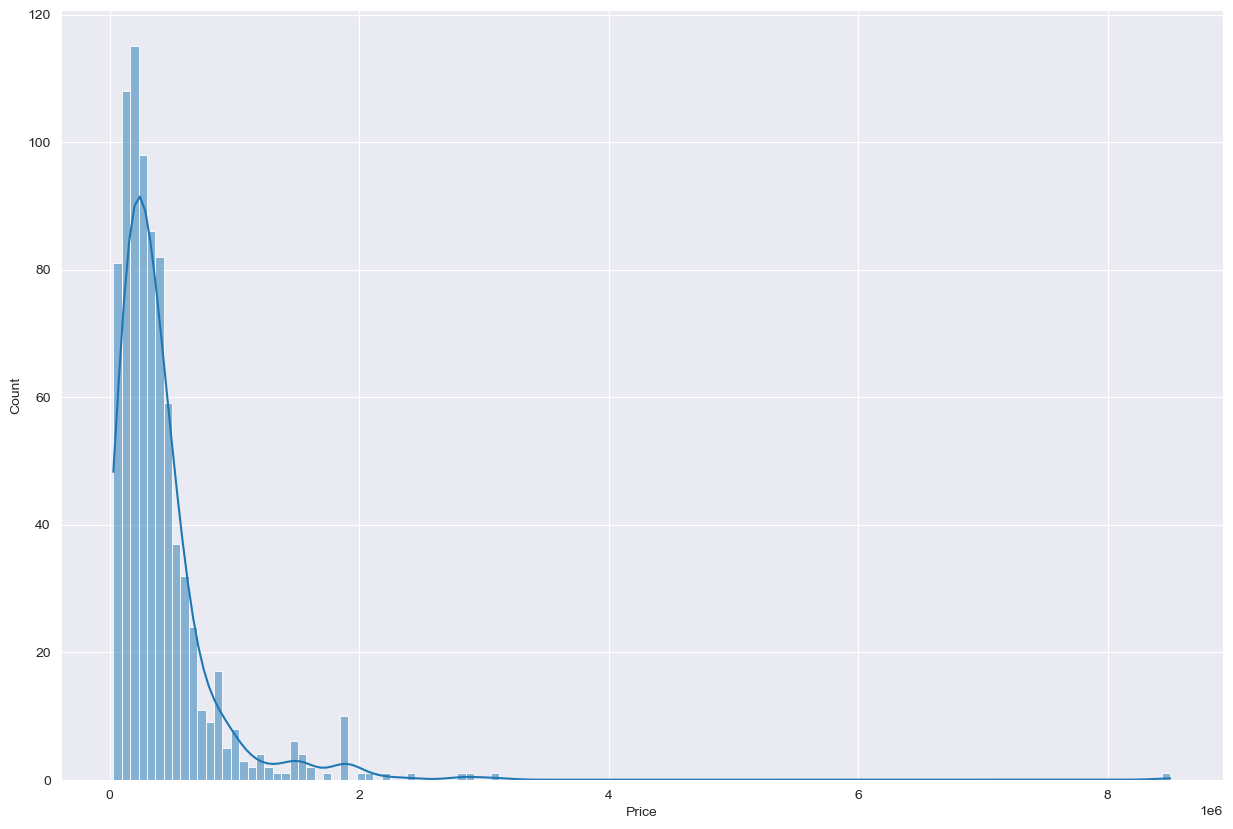

In [42]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,10),dpi=100)
sns.histplot(df['Price'],kde=True)
plt.show()

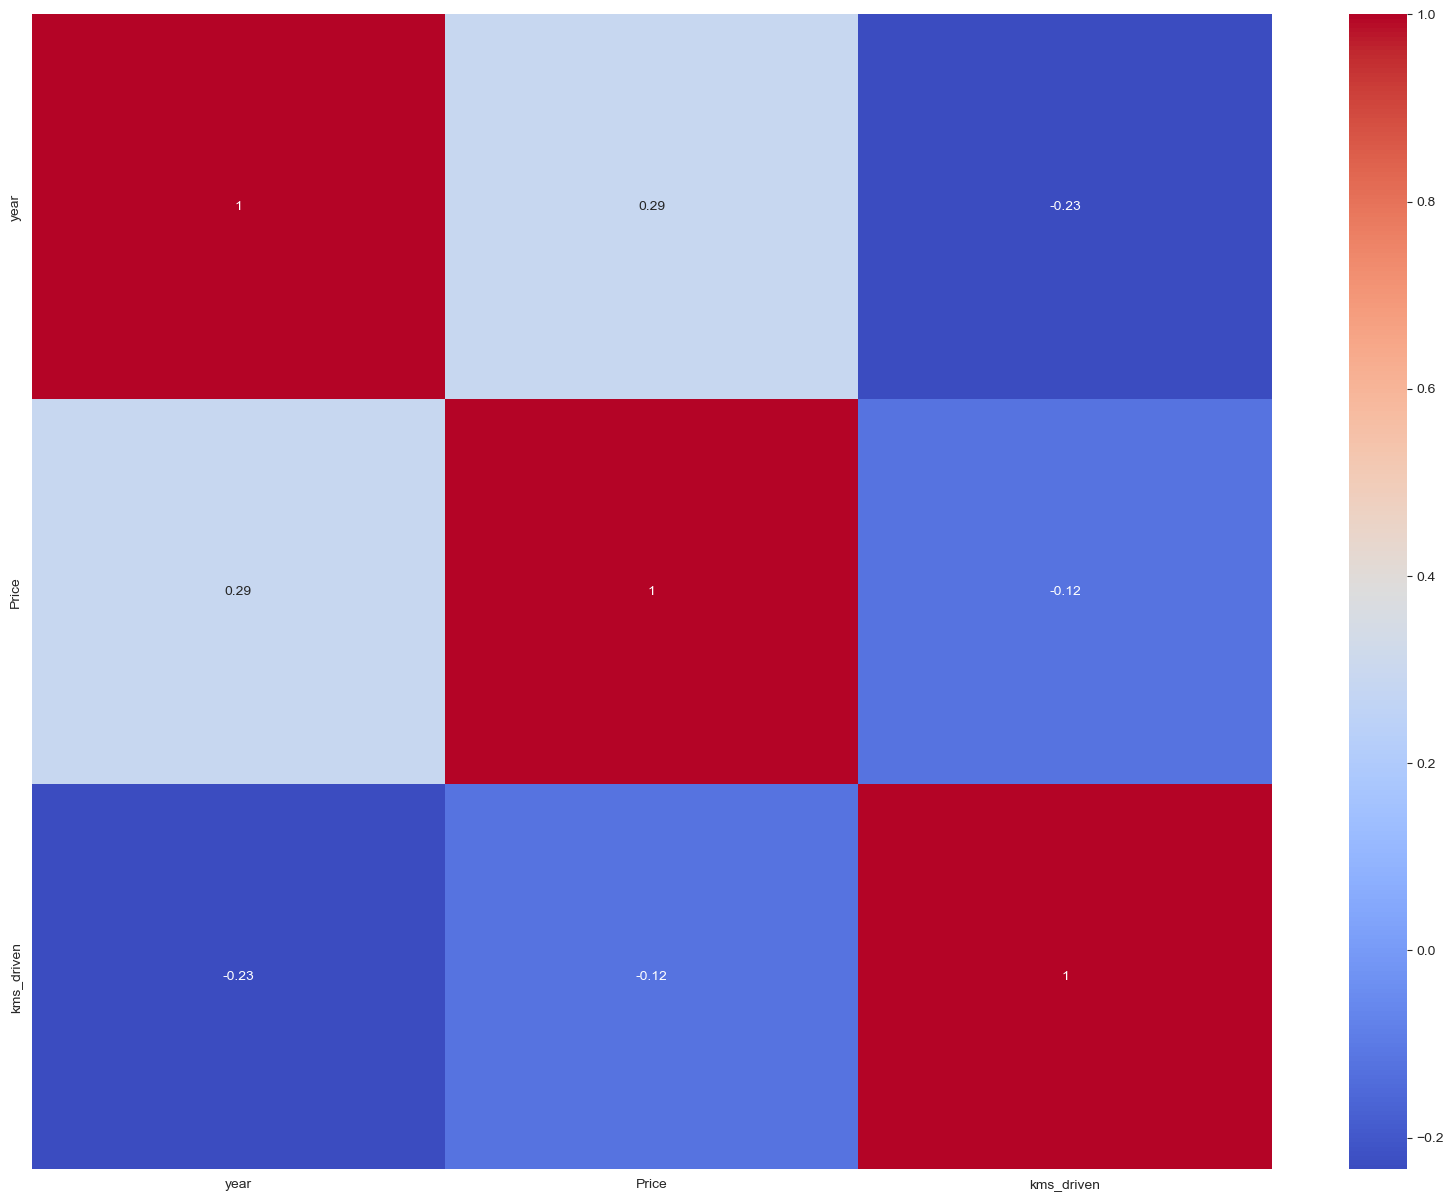

In [43]:
plt.figure(figsize=(20,15))
corr_matrix=df.corr(numeric_only=True)
sns.heatmap(corr_matrix,cmap="coolwarm",annot=True)
plt.show()

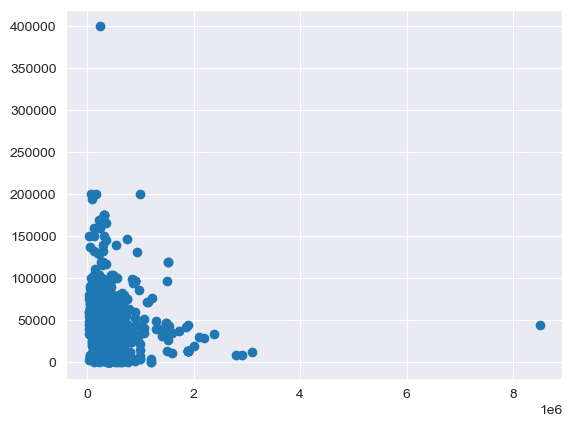

In [44]:
plt.scatter(df['Price'],df['kms_driven'])
plt.show()

<Axes: ylabel='Price'>

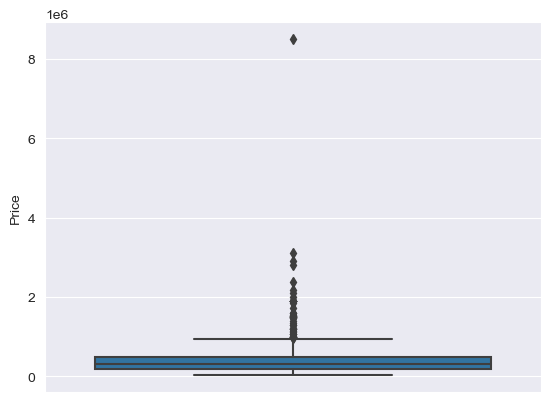

In [45]:
sns.boxplot(y='Price',data=df)

Outliers are present in the 'Price' column so we need to treat the outliers.


#### Outlier Treatment of 'Price' column

In [46]:
df.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [47]:
q1=1.750000e+05
q3=4.912500e+05

iqr=q3-q1

lower_limit=q1-1.5*(iqr)
upper_limit=q3+1.5*(iqr)

print("IQR of Price column is: ", iqr)
print("Lower Limit of Price column is: ",lower_limit)
print("Upper Limit of Price column is: ",upper_limit)

IQR of Price column is:  316250.0
Lower Limit of Price column is:  -299375.0
Upper Limit of Price column is:  965625.0


In [48]:
df['Price']=df['Price'].clip(lower_limit,upper_limit)

<Axes: ylabel='Price'>

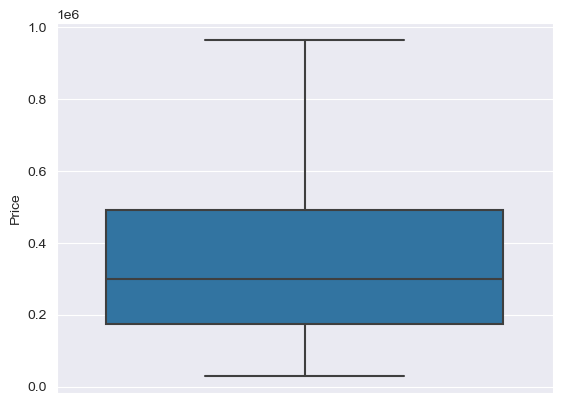

In [49]:
sns.boxplot(y='Price',data=df)

Removed the outliers in 'Price' column.

#### Outlier Treatment in 'kms_driven' column.

<Axes: ylabel='kms_driven'>

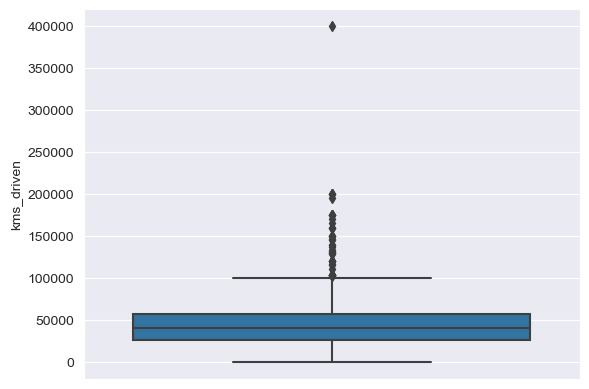

In [50]:
sns.boxplot(y='kms_driven',data=df)

In [51]:
q1=27000.000000
q3=56818.500000

iqr=q3-q1

lower_limit=q1-1.5*(iqr)
upper_limit=q3+1.5*(iqr)

print("IQR of Kms_driven column is: ", iqr)
print("Lower Limit of Kms_driven column is: ",lower_limit)
print("Upper Limit of kms_driven column is: ",upper_limit)

IQR of Kms_driven column is:  29818.5
Lower Limit of Kms_driven column is:  -17727.75
Upper Limit of kms_driven column is:  101546.25


In [52]:
df['kms_driven']=df['kms_driven'].clip(lower_limit,upper_limit)

<Axes: ylabel='kms_driven'>

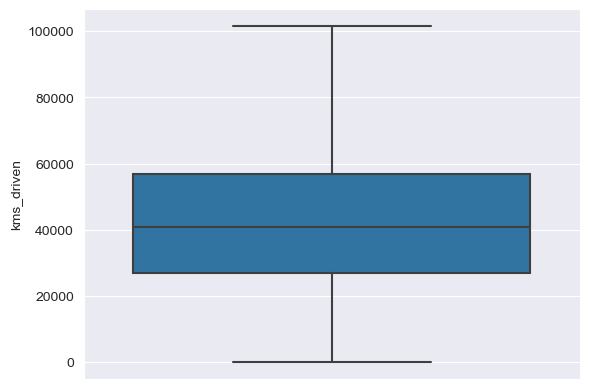

In [53]:
sns.boxplot(y='kms_driven',data=df)

Removed the outliers in 'kms_driven' column

<Axes: ylabel='year'>

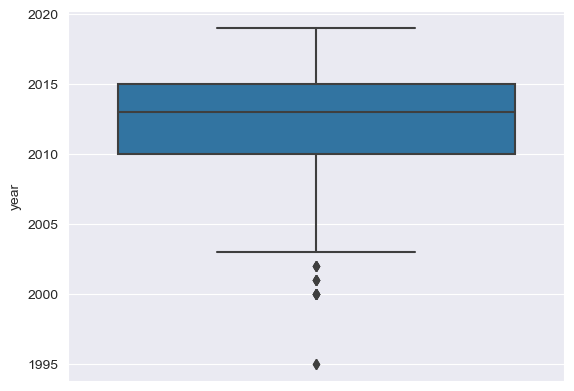

In [54]:
sns.boxplot(y='year',data=df)

In [55]:
df.describe()

,year,Price,kms_driven
count,816.000000,816.000000,816.000000
mean,2012.444853,364792.659314,43890.821998
std,4.002992,252138.843046,25947.227843
min,1995.000000,30000.000000,0.000000
25%,2010.000000,175000.000000,27000.000000
50%,2013.000000,299999.000000,41000.000000
75%,2015.000000,491250.000000,56818.500000
max,2019.000000,965625.000000,101546.250000


In [56]:
q1=2010.000000
q3=2015.000000	

iqr=q3-q1

lower_limit=q1-1.5*(iqr)
upper_limit=q3+1.5*(iqr)

print("IQR of year column is: ", iqr)
print("Lower Limit of year column is: ",lower_limit)
print("Upper Limit of year column is: ",upper_limit)

IQR of year column is:  5.0
Lower Limit of year column is:  2002.5
Upper Limit of year column is:  2022.5


In [57]:
df['year']=df['year'].clip(lower_limit,upper_limit)

<Axes: ylabel='year'>

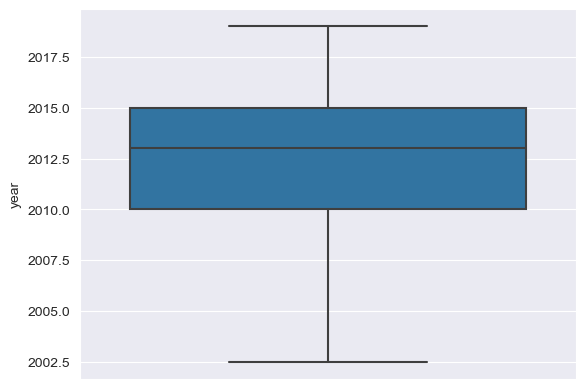

In [58]:
sns.boxplot(y='year',data=df)

Removed the outliers of 'year' column.

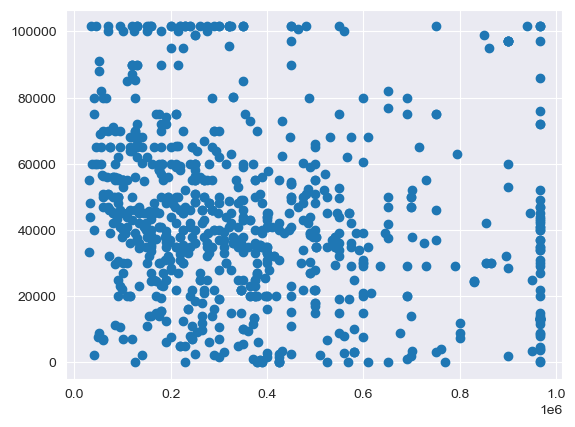

In [59]:
plt.scatter(df['Price'],df['kms_driven'])
plt.show()

Now the outliers are handled.

In [60]:
df['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

In [61]:
df['company'].value_counts()

company
Maruti        221
Hyundai       139
Mahindra       98
Tata           65
Honda          60
Toyota         36
Chevrolet      34
Renault        33
Ford           30
Volkswagen     19
Skoda          13
Audi           11
Mini            8
BMW             8
Datsun          7
Mitsubishi      6
Nissan          6
Mercedes        6
Fiat            4
Force           4
Hindustan       3
Jaguar          2
Land            1
Jeep            1
Volvo           1
Name: count, dtype: int64

#### Count of cars per Company

In [62]:
df1=df.copy()
df1.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007.0,80000,45000.0,Petrol
1,Mahindra Jeep CL550,Mahindra,2006.0,425000,40.0,Diesel
3,Hyundai Grand i10,Hyundai,2014.0,325000,28000.0,Petrol
4,Ford EcoSport Titanium,Ford,2014.0,575000,36000.0,Diesel
6,Ford Figo,Ford,2012.0,175000,41000.0,Diesel


In [63]:
df1=df1.groupby('company').count()

#creates a group for each unique value in the 'company' column.
#and count of occurrences for each unique value in the 'Company' column within each group


In [64]:
df1=df1.sort_values(by=['name','company'],ascending=False)
df1

,name,year,Price,kms_driven,fuel_type
company,,,,,
Maruti,221,221,221,221,221
Hyundai,139,139,139,139,139
Mahindra,98,98,98,98,98
Tata,65,65,65,65,65
Honda,60,60,60,60,60
Toyota,36,36,36,36,36
Chevrolet,34,34,34,34,34
Renault,33,33,33,33,33
Ford,30,30,30,30,30


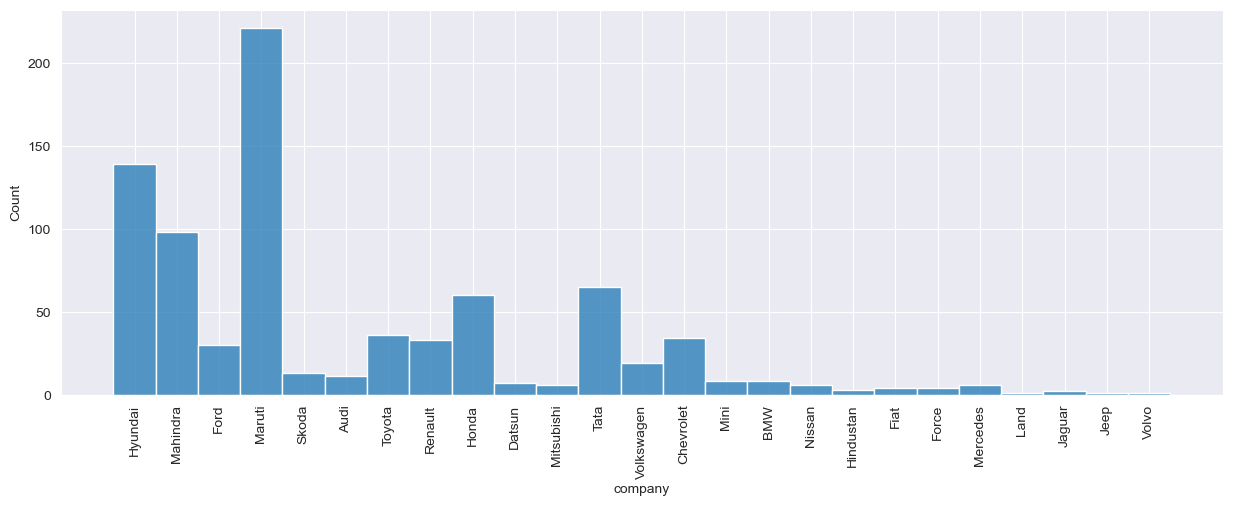

In [65]:
plt.figure(figsize=(15,5))
sns.histplot(x=df['company'])
plt.xticks(rotation=90)
plt.show()

Encoding Categorical Columns
- We have categorical columns in our dataset we need to encode it before model training, we will use OneHotEncoding(OHE) fro the purpose.

Encoding 'fuel_type', 'company', 'name' columns

In [66]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', 'LPG'], dtype=object)

In [67]:
dummies1=pd.get_dummies(df['fuel_type'],dtype=int)
dummies1

,Diesel,LPG,Petrol
0,0,0,1
1,1,0,0
3,0,0,1
4,1,0,0
6,1,0,0
...,...,...,...
883,0,0,1
885,1,0,0
886,0,0,1
888,1,0,0


In [68]:
df=pd.concat([df,dummies1],axis=1)
df

,name,company,year,Price,kms_driven,fuel_type,Diesel,LPG,Petrol
0,Hyundai Santro Xing,Hyundai,2007.0,80000,45000.00,Petrol,0,0,1
1,Mahindra Jeep CL550,Mahindra,2006.0,425000,40.00,Diesel,1,0,0
3,Hyundai Grand i10,Hyundai,2014.0,325000,28000.00,Petrol,0,0,1
4,Ford EcoSport Titanium,Ford,2014.0,575000,36000.00,Diesel,1,0,0
6,Ford Figo,Ford,2012.0,175000,41000.00,Diesel,1,0,0
...,...,...,...,...,...,...,...,...,...
883,Maruti Suzuki Ritz,Maruti,2011.0,270000,50000.00,Petrol,0,0,1
885,Tata Indica V2,Tata,2009.0,110000,30000.00,Diesel,1,0,0
886,Toyota Corolla Altis,Toyota,2009.0,300000,101546.25,Petrol,0,0,1
888,Tata Zest XM,Tata,2018.0,260000,27000.00,Diesel,1,0,0


In [69]:
df=df.drop(['fuel_type'],axis=1)

In [70]:
df

,name,company,year,Price,kms_driven,Diesel,LPG,Petrol
0,Hyundai Santro Xing,Hyundai,2007.0,80000,45000.00,0,0,1
1,Mahindra Jeep CL550,Mahindra,2006.0,425000,40.00,1,0,0
3,Hyundai Grand i10,Hyundai,2014.0,325000,28000.00,0,0,1
4,Ford EcoSport Titanium,Ford,2014.0,575000,36000.00,1,0,0
6,Ford Figo,Ford,2012.0,175000,41000.00,1,0,0
...,...,...,...,...,...,...,...,...
883,Maruti Suzuki Ritz,Maruti,2011.0,270000,50000.00,0,0,1
885,Tata Indica V2,Tata,2009.0,110000,30000.00,1,0,0
886,Toyota Corolla Altis,Toyota,2009.0,300000,101546.25,0,0,1
888,Tata Zest XM,Tata,2018.0,260000,27000.00,1,0,0


In [71]:
dummies2=pd.get_dummies(df['company'],dtype=int)
dummies2

,Audi,BMW,Chevrolet,Datsun,Fiat,Force,Ford,Hindustan,Honda,Hyundai,...,Mercedes,Mini,Mitsubishi,Nissan,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
885,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [72]:
df=pd.concat([df,dummies2],axis=1)
df=df.drop(['company'],axis=1)

In [73]:
df

,name,year,Price,kms_driven,Diesel,LPG,Petrol,Audi,BMW,Chevrolet,...,Mercedes,Mini,Mitsubishi,Nissan,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,Hyundai Santro Xing,2007.0,80000,45000.00,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Mahindra Jeep CL550,2006.0,425000,40.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Hyundai Grand i10,2014.0,325000,28000.00,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Ford EcoSport Titanium,2014.0,575000,36000.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Ford Figo,2012.0,175000,41000.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,Maruti Suzuki Ritz,2011.0,270000,50000.00,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
885,Tata Indica V2,2009.0,110000,30000.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
886,Toyota Corolla Altis,2009.0,300000,101546.25,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
888,Tata Zest XM,2018.0,260000,27000.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [74]:
dummies3=pd.get_dummies(df['name'],dtype=int)
dummies3

,Audi A3 Cabriolet,Audi A4 1.8,Audi A4 2.0,Audi A6 2.0,Audi A8,Audi Q3 2.0,Audi Q5 2.0,Audi Q7,BMW 3 Series,BMW 5 Series,...,Volkswagen Passat Diesel,Volkswagen Polo,Volkswagen Polo Comfortline,Volkswagen Polo Highline,Volkswagen Polo Highline1.2L,Volkswagen Polo Trendline,Volkswagen Vento Comfortline,Volkswagen Vento Highline,Volkswagen Vento Konekt,Volvo S80 Summum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
885,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
df=pd.concat([df,dummies3],axis=1)
df=df.drop(['name'],axis=1)
df

,year,Price,kms_driven,Diesel,LPG,Petrol,Audi,BMW,Chevrolet,Datsun,...,Volkswagen Passat Diesel,Volkswagen Polo,Volkswagen Polo Comfortline,Volkswagen Polo Highline,Volkswagen Polo Highline1.2L,Volkswagen Polo Trendline,Volkswagen Vento Comfortline,Volkswagen Vento Highline,Volkswagen Vento Konekt,Volvo S80 Summum
0,2007.0,80000,45000.00,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006.0,425000,40.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2014.0,325000,28000.00,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014.0,575000,36000.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2012.0,175000,41000.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,2011.0,270000,50000.00,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
885,2009.0,110000,30000.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
886,2009.0,300000,101546.25,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
888,2018.0,260000,27000.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Performing Scaling on 'kms_driven' column.

In [76]:
scaler=StandardScaler()
scaler.fit(df[['kms_driven','year']])

StandardScaler()

In [77]:
df[['kms_driven','year']]=scaler.transform(df[['kms_driven','year']])

In [78]:
df

,year,Price,kms_driven,Diesel,LPG,Petrol,Audi,BMW,Chevrolet,Datsun,...,Volkswagen Passat Diesel,Volkswagen Polo,Volkswagen Polo Comfortline,Volkswagen Polo Highline,Volkswagen Polo Highline1.2L,Volkswagen Polo Trendline,Volkswagen Vento Comfortline,Volkswagen Vento Highline,Volkswagen Vento Konekt,Volvo S80 Summum
0,-1.430082,80000,0.042774,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.690271,425000,-1.691037,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.391240,325000,-0.612804,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.391240,575000,-0.304297,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,-0.129138,175000,-0.111480,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,-0.389327,270000,0.235591,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
885,-0.909704,110000,-0.535677,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
886,-0.909704,300000,2.223389,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
888,1.431995,260000,-0.651368,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Feature Engineering and Training the Data


In [79]:
X=df.drop(columns='Price')
y=df['Price']

In [80]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [81]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [82]:
# Making predictions on the test data
y_predicted=lr.predict(X_test)
print(y_predicted)


[ 3.89376000e+05  3.41652102e+17  4.85120000e+05  6.34880000e+05
  3.18464000e+05  1.19296000e+05  2.88000000e+05  1.00428800e+06
 -3.88305715e+17  2.23488000e+05  3.12832000e+05  8.20992000e+05
  5.52960000e+04  2.58560000e+05  3.62752000e+05  3.66848000e+05
  3.99360000e+04  4.01664000e+05  5.17888000e+05  4.89984000e+05
  1.32608000e+05  2.36288000e+05  6.89152000e+05  5.46304000e+05
  4.55429020e+18  6.96143002e+17  6.89920000e+05  6.11328000e+05
  2.18112000e+05  9.21344000e+05  1.50528000e+05 -1.59803183e+18
  1.13152000e+05  3.97824000e+05  2.01728000e+05  2.82112000e+05
  2.82624000e+05  1.92768000e+05  6.07744000e+05  3.14014526e+16
  3.15904000e+05  3.63776000e+05  2.91072000e+05  2.70336000e+05
  6.34880000e+04  7.72608000e+05  2.55488000e+05  8.82688000e+05
  5.78560000e+05  1.06240000e+05  3.14014526e+16  1.30560000e+05
  3.04384000e+05  2.33472000e+05  2.15343344e+18  4.35200000e+04
  5.20192000e+05  4.07552000e+05  8.94720000e+05  8.32000000e+04
 -1.70276418e+18 -1.23601

In [83]:
print(y_test)

324    444999
149    224999
333    549999
21     310000
76     344999
        ...  
871    290000
416    280000
236    245000
679    360000
14      80000
Name: Price, Length: 164, dtype: int64


In [84]:
# Calculate the R2 score
#r2 = r2_score(y_test, y_predicted)
#print("R2 Score  of Linear Regression:", r2)

In [85]:
coeff=lr.coef_
print("Coefficient of Regression",coeff)
#to get the slope value

Coefficient of Regression [ 8.07443288e+04 -1.02122093e+04 -2.29745136e+18 -2.29745136e+18
 -2.29745136e+18 -1.74005479e+16  5.51423716e+17 -1.28306469e+17
 -4.02795608e+17  7.54077135e+17  1.49012399e+17  6.49736069e+17
  2.18509181e+18  1.73442303e+18  3.20860359e+17  2.89105192e+17
  7.17932501e+17  8.59570345e+16  7.37054195e+17  2.13850322e+17
  6.30959760e+17  4.82149930e+17  1.38839788e+18  1.09618113e+18
  4.15973458e+17  2.28375379e+18  7.85929902e+17  7.17944905e+17
  1.19412273e+18 -1.22588940e+18  7.71928997e+17  7.71928997e+17
  7.71928997e+17 -1.17642485e+18  7.71928997e+17 -8.26102831e+17
  7.71928997e+17  7.71928997e+17  2.03104733e+17  2.03104733e+17
  2.03104733e+17  2.03104733e+17  2.03104733e+17  4.75739494e+18
  8.82834918e+17  8.82834918e+17  8.82834918e+17  8.82834918e+17
  8.82834918e+17  8.82834918e+17  8.82834918e+17  8.82834918e+17
  8.82834918e+17  8.82834918e+17  8.82834918e+17  8.82834918e+17
  8.82834918e+17  8.82834918e+17  8.82834918e+17  8.82834918e+17

In [86]:
#to get intercept value or bias
inter=lr.intercept_
print("Intercept of Regression line",inter)

Intercept of Regression line 1.5429229112354944e+18


In [87]:
from sklearn.metrics import r2_score

In [88]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error

In [89]:
# Lasso Regression
lasso_regressor = Lasso(alpha=0.1)  #the alpha parameter for regularization strength is  adjustable
lasso_regressor.fit(X_train, y_train)
lasso_predictions = lasso_regressor.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
print("Lasso Mean Squared Error:", lasso_mse)



Lasso Mean Squared Error: 13107143620.031979


C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.329e+12, tolerance: 4.253e+09
  model = cd_fast.enet_coordinate_descent(


In [90]:
# Calculate R2 score for Lasso Regressor
lasso_r2 = r2_score(y_test, lasso_predictions)
print("R2 Score for Lasso Regressor:", lasso_r2)

R2 Score for Lasso Regressor: 0.7682795053054865


In [91]:
# Ridge Regression
ridge_regressor = Ridge(alpha=0.1)  # You can adjust the alpha parameter for regularization strength
ridge_regressor.fit(X_train, y_train)
ridge_predictions = ridge_regressor.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
print("Ridge Mean Squared Error:", ridge_mse)

Ridge Mean Squared Error: 11710582179.621561


In [92]:
# Calculate R2 score for Ridge Regressor
ridge_r2 = r2_score(y_test, ridge_predictions)
print("R2 Score for Ridge Regressor:", ridge_r2)

R2 Score for Ridge Regressor: 0.7929692407066155


#### Observation:

- An R2 score of 0.768 for the Lasso Regressor and 0.793 for the Ridge Regressor are both relatively high scores. This suggests that both models are performing well in explaining the variance in the dependent variable.